In [1]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [2]:
from PIL import Image
from chemgrid_game.chemistry.molecule import Molecule
from chemgrid_game.plotting import plot_mols
from matplotlib import pyplot as plt

from experiments.chemgrid_experiments.backend_agents import planner
from experiments.chemgrid_experiments.backend_agents import policies
from experiments.chemgrid_experiments.backend_agents.game_backend_wrapper import GameBackendWrapper
from experiments.chemgrid_experiments.backend_agents.planning_utils import ExperimentRunner
from experiments.chemgrid_experiments.graph_search import graph_generation
from experiments.chemgrid_experiments.graph_search.search import GraphSearchHeuristic

In [3]:
n_agents = 2
grid_size = 6

# Define inventories and targets

In [4]:
mol1 = Molecule([[1]], grid_size=grid_size)

mol2 = Molecule([
    [1, 1],
    [1, 1]
], grid_size=grid_size)

mol3 = Molecule([
    [0, 1],
    [1, 1],
    [0, 1],
], grid_size=grid_size)

target1 = Molecule([
    [1, 1],
    [1, 1],
    [0, 1],
    [1, 1],
    [0, 1],
], grid_size=grid_size)

target2 = Molecule([
    [1, 1, 0, 1],
    [1, 1, 1, 1],
    [0, 0, 0, 1],
], grid_size=grid_size)

target_mols = [target1, target2]
inventories = [[mol1, mol2], [mol1, mol3]]

## Inventories

inventory 0


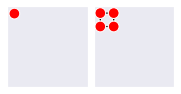

inventory 1


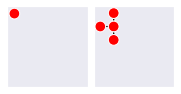

In [5]:
for i, inventory in enumerate(inventories):
    print(f"inventory {i}")
    fig, axs = plot_mols(inventory, m=1, n=len(inventory), scale=0.2, background=True)

## Targets

target 0


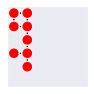

target 1


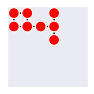

In [6]:
for i, target in enumerate(target_mols):
    print(f"target {i}")
    fig, ax = plot_mols(target, m=1, scale=0.2, background=True)

## Experiment

In [7]:
search_params = dict(
    use_tqdm=False,
    target_match_weight=0.1,
    return_best_if_fail=True,
    max_inventory_size=1000,
    n_steps=1000
)

policy_params = dict(logger_level="DEBUG", contract_th=1)

experiment = ExperimentRunner(
    planner_class=planner.Planner,
    search_class=GraphSearchHeuristic,
    search_params=search_params,
    policy_class=policies.FuturePlanPolicy,
    policy_params=policy_params,
    env_class=GameBackendWrapper,
    max_steps=15,
    target_mols=target_mols,
    inventories=inventories
)

history = experiment.run()

2022-03-21 18:29:23,736 - FuturePlanPolicy - DEBUG: Agent 0's turn
2022-03-21 18:29:23,911 - FuturePlanPolicy - DEBUG: Evaluating (3551309043026993909, -1196729050078863823), scores: 0.4, 0.4
2022-03-21 18:29:23,911 - FuturePlanPolicy - DEBUG: Creating new contract: (0.4, 0.4, 0, 1, -1196729050078863823, 3551309043026993909)
2022-03-21 18:29:23,912 - FuturePlanPolicy - DEBUG: Agent 1's turn
2022-03-21 18:29:23,921 - FuturePlanPolicy - DEBUG: Evaluating (-1196729050078863823, 3551309043026993909), scores: 0.4, 0.4
2022-03-21 18:29:23,922 - FuturePlanPolicy - DEBUG: Creating new contract: (0.4, 0.4, 1, 0, 3551309043026993909, -1196729050078863823)
2022-03-21 18:29:23,924 - FuturePlanPolicy - DEBUG: Agent 0's turn
2022-03-21 18:29:23,965 - FuturePlanPolicy - DEBUG: Evaluating (4143993681087961292, -2693491964604642552), scores: -1.0, -1
2022-03-21 18:29:23,966 - FuturePlanPolicy - DEBUG: Failed to offer new contract, executing first step of plan: [Action(op='join', operands=(3551309043026

In [8]:
seqs = [history.get_build_history(i, archive=experiment.env.archive) for i in range(history.n_agents)]
ps = [graph_generation.save_graph_to_img(graph_generation.seq_to_graph(seq)) for seq in seqs]

Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs
Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs


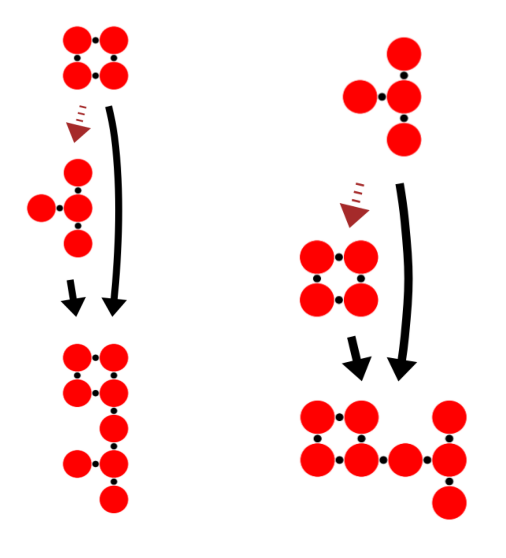

In [9]:
fig, axs = plt.subplots(1, len(ps), figsize=(10, 10))

for p, ax in zip(ps, axs.flatten()):
    with Image.open(p) as im:
        ax.imshow(im)
        ax.set_axis_off()